# 构建AI模型并部署Web应用，预测二手车价格

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [36]:
# 读取源数据
df = pd.read_csv('./data/CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


###  特征工程

In [37]:
corr = df.corr(numeric_only=True)
corr

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


<Axes: >

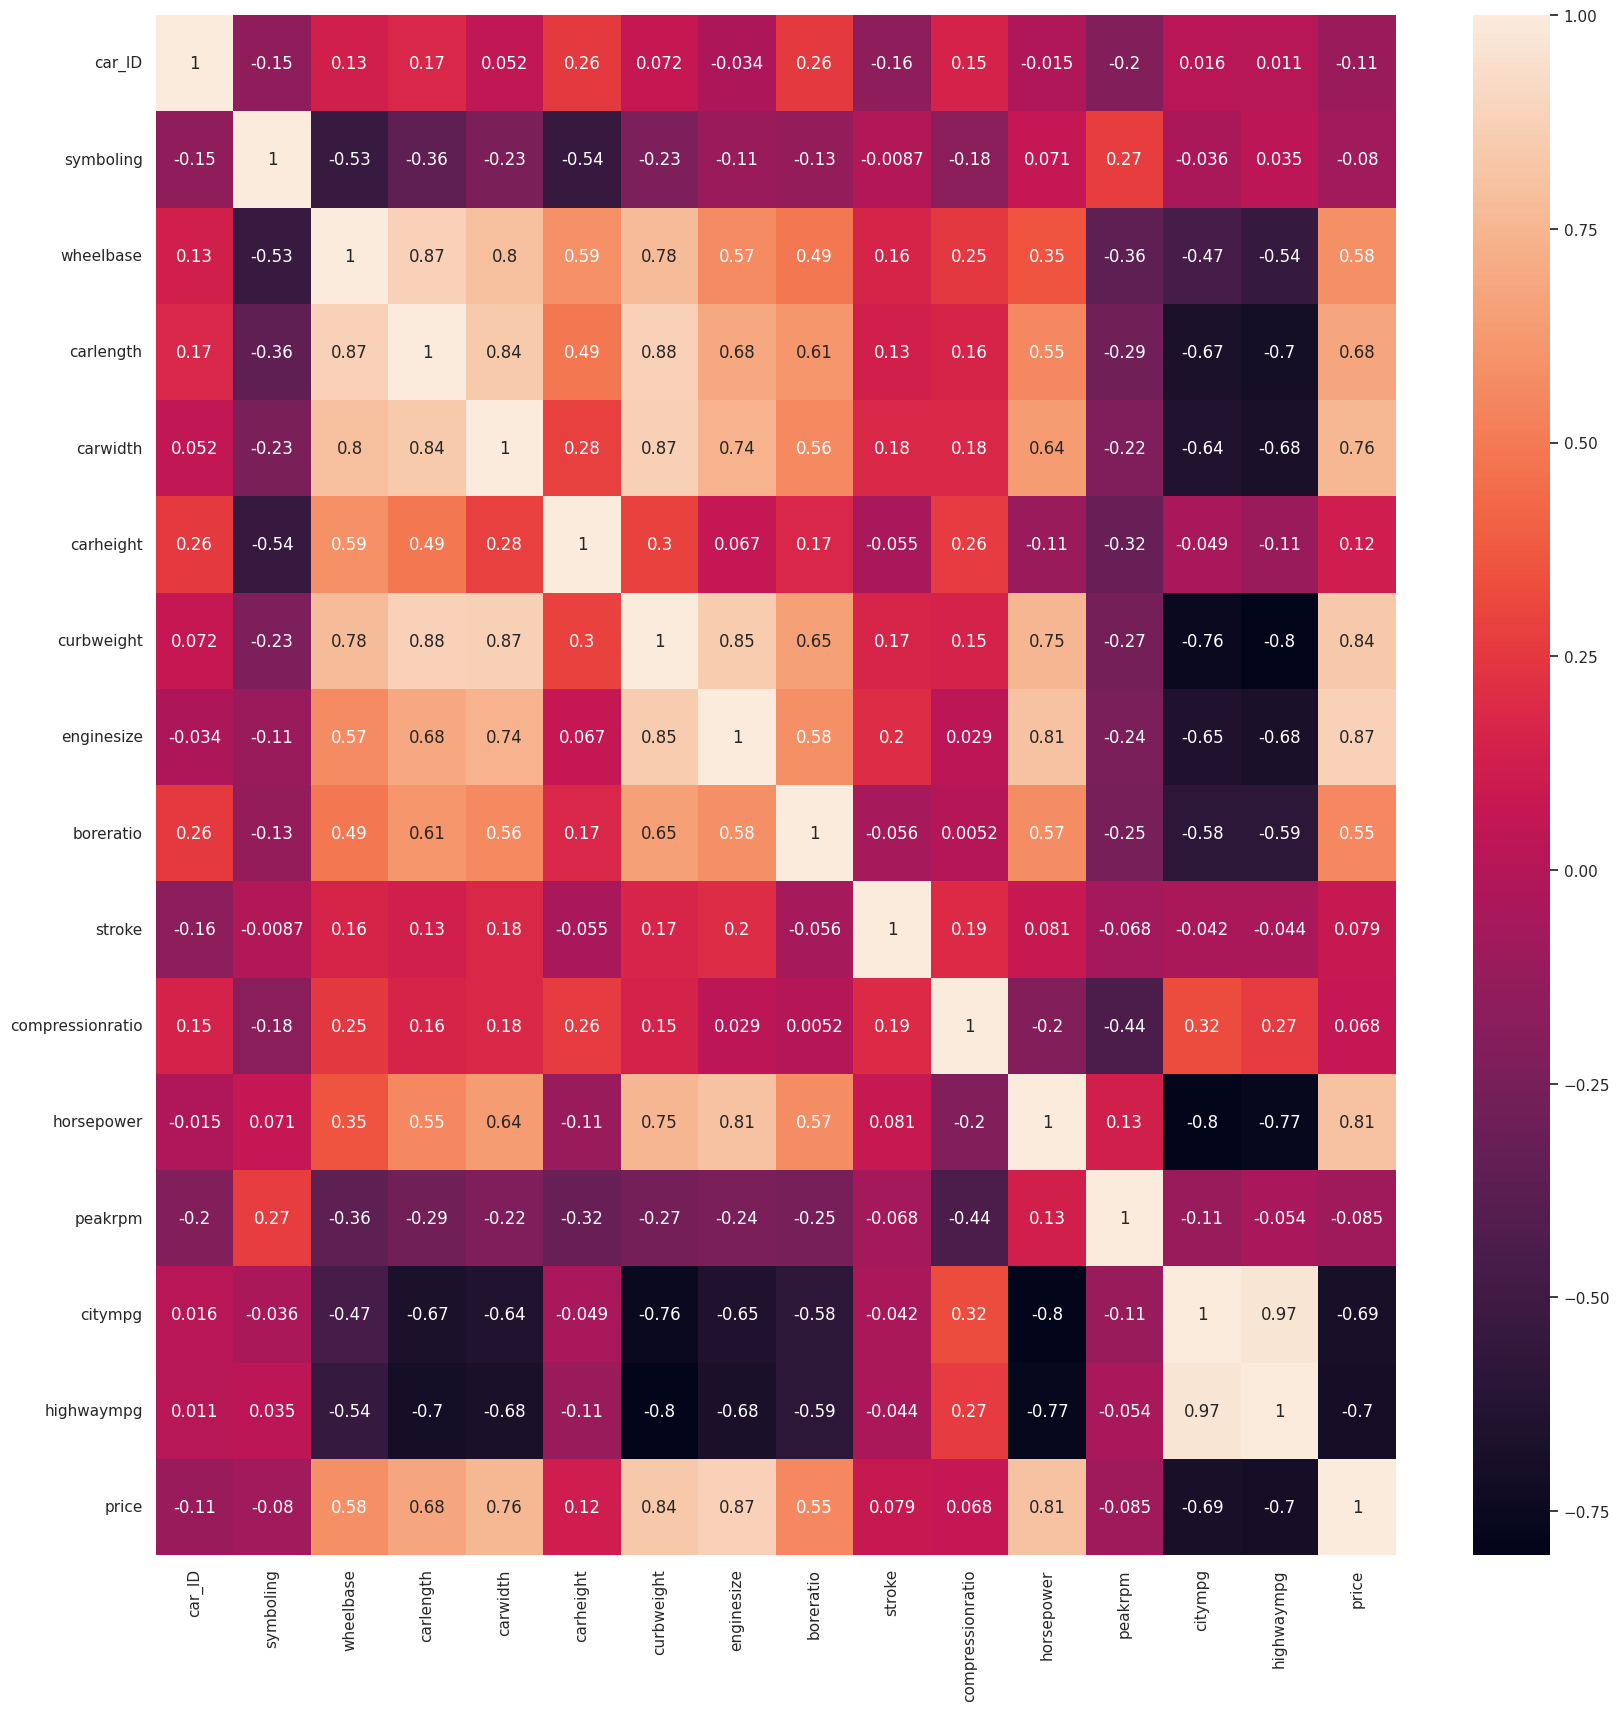

In [38]:
sns.set(rc={'figure.figsize': [20, 20]})
sns.heatmap(corr, annot=True)

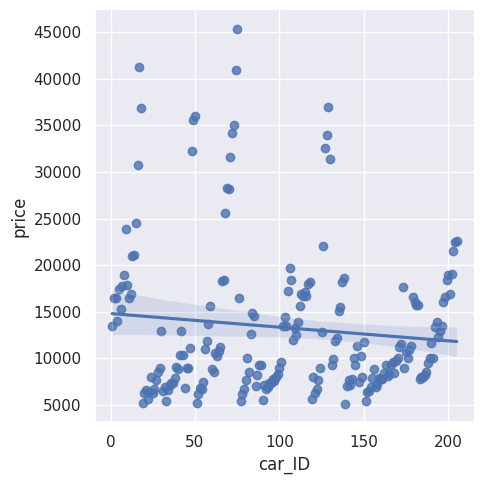

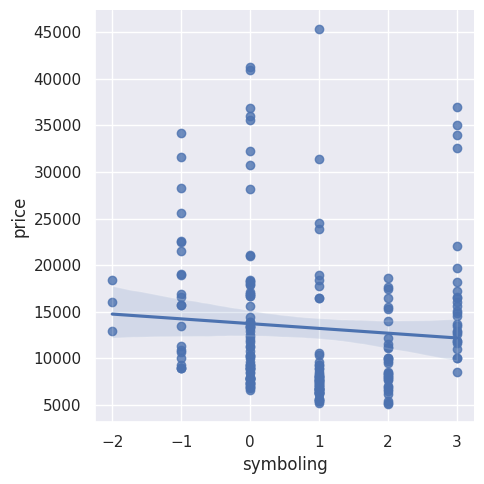

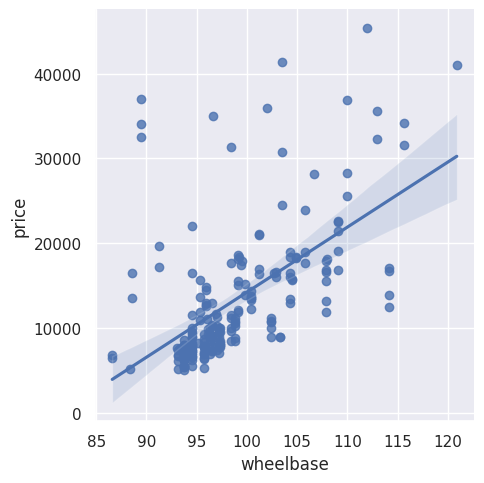

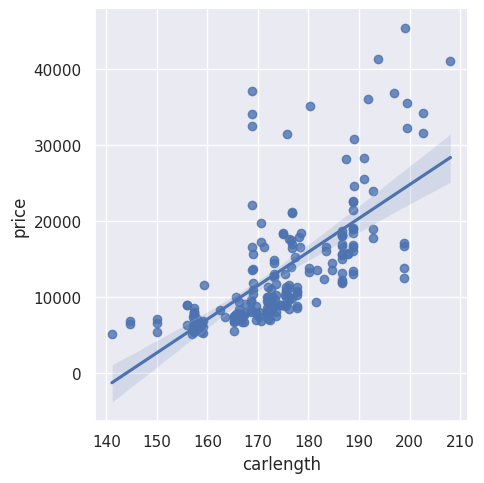

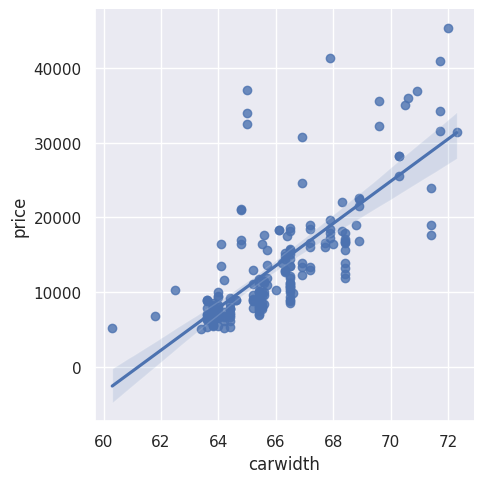

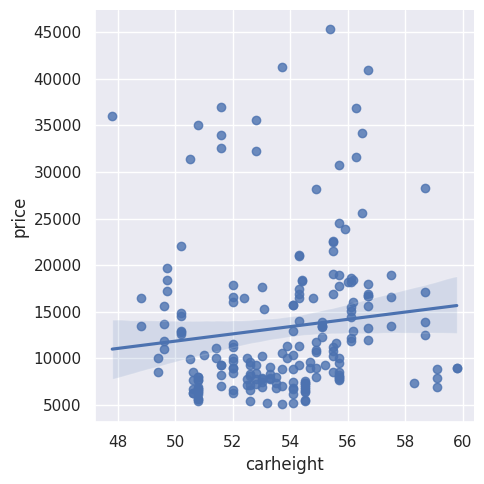

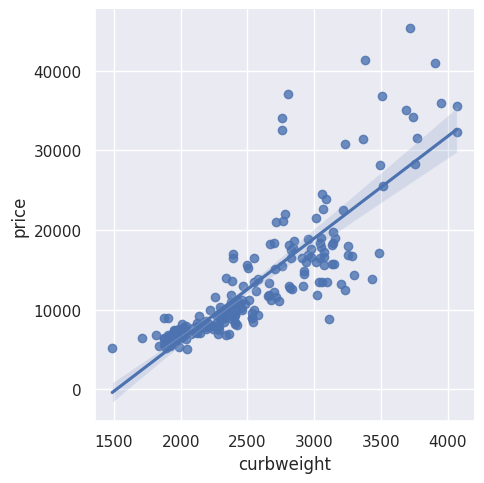

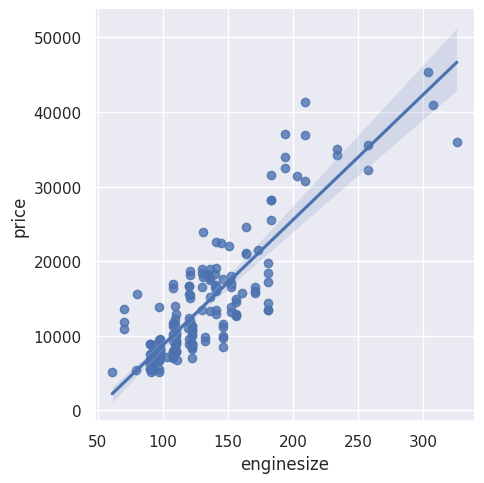

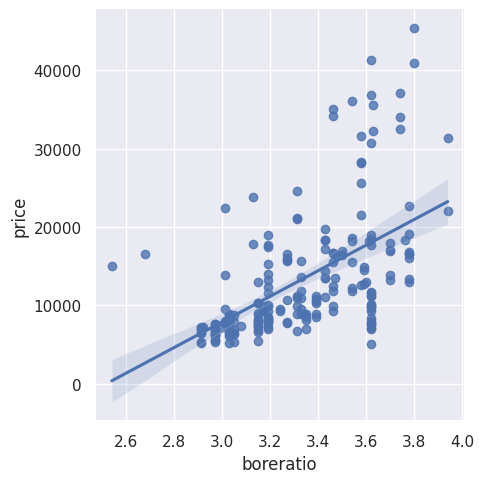

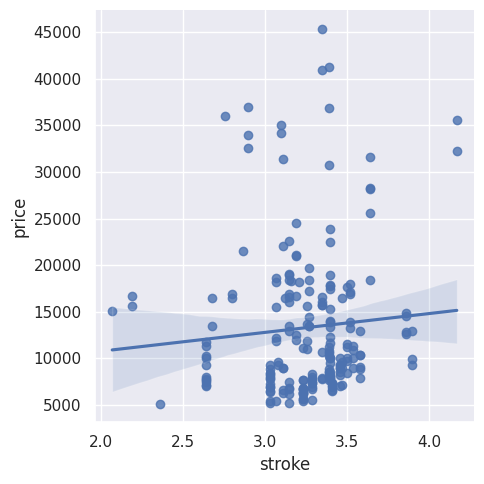

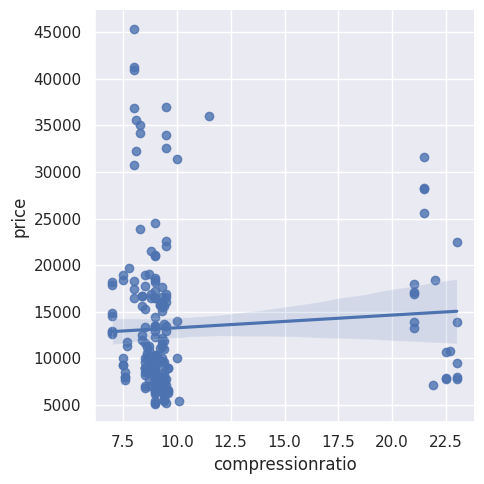

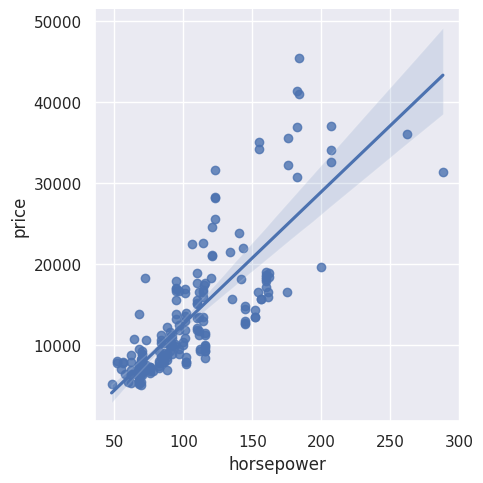

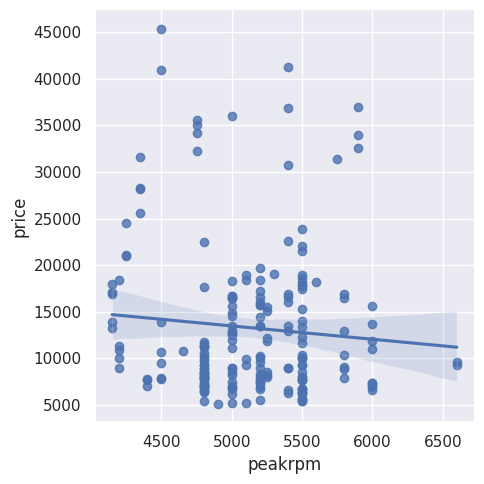

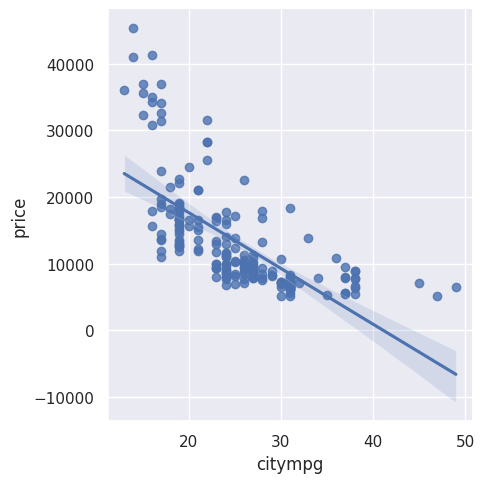

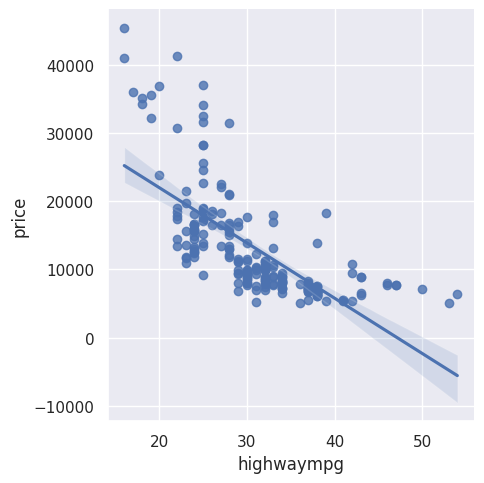

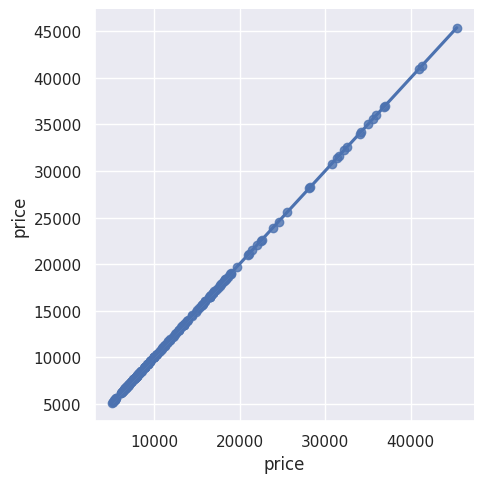

In [39]:
for col in df.columns:
	if df[col].dtypes != "object":
		sns.set(rc={'figure.figsize': [5, 5]})
		sns.lmplot(data=df, x=col, y="price")

In [40]:
# 删除相关性低于0.15的字段
to_drop = ['car_ID', 'peakrpm', 'compressionratio', 'stroke', 'symboling']
df.drop(df[to_drop], axis=1, inplace=True)

In [41]:
# 清洗汽车品牌
df['CarName'] = df['CarName'].apply(lambda x: x.split()[0])
df['CarName'] = df['CarName'].str.lower()
df['CarName'] = df['CarName'].replace(
	{'vw': 'volkswagen', 'vokswagen': 'volkswagen', 'toyouta': 'toyota', 'maxda': 'mazda', 'porcshce': 'porsche'})
df.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,2548,dohc,four,130,mpfi,3.47,111,21,27,13495.0
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,2548,dohc,four,130,mpfi,3.47,111,21,27,16500.0
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,2823,ohcv,six,152,mpfi,2.68,154,19,26,16500.0
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,2337,ohc,four,109,mpfi,3.19,102,24,30,13950.0
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,2824,ohc,five,136,mpfi,3.19,115,18,22,17450.0


In [42]:
df.to_csv('data/original_df.csv', index=False, header=True)

<Axes: xlabel='CarName', ylabel='count'>

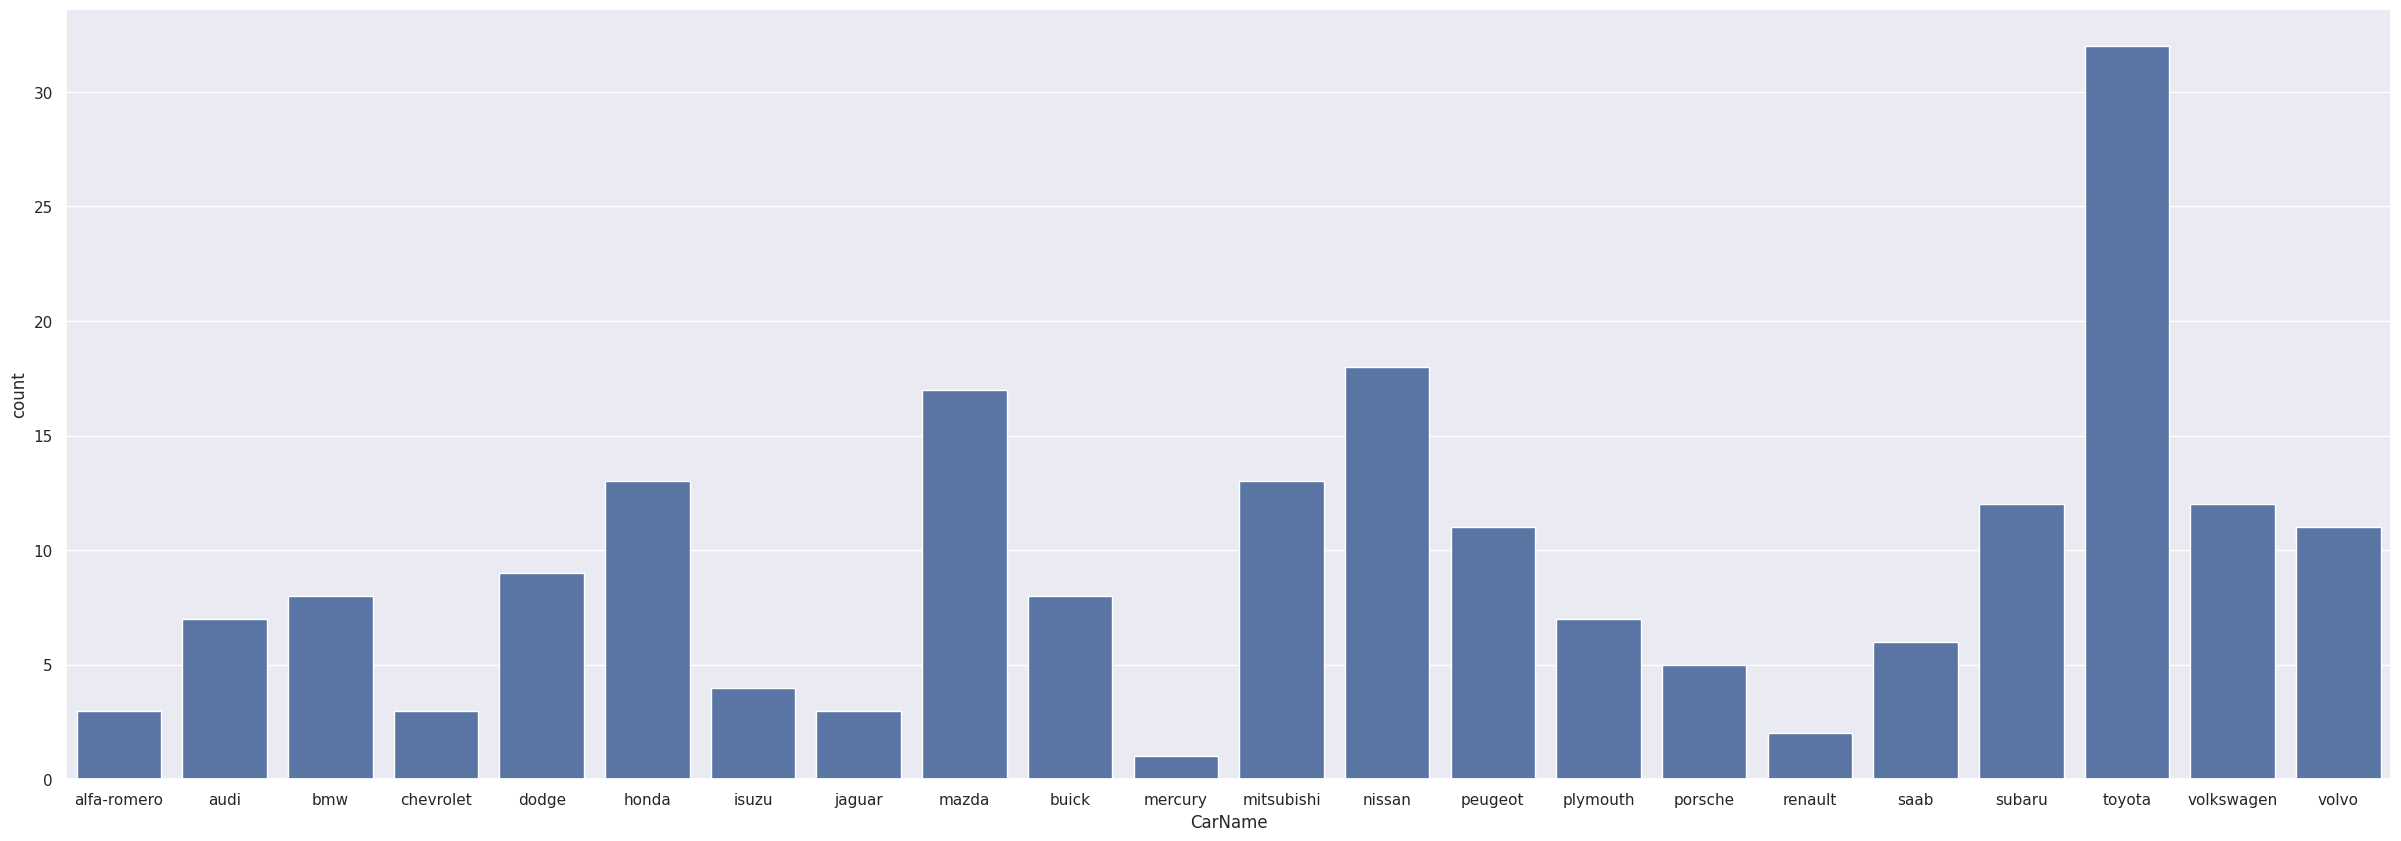

In [43]:
# 统计品牌
sns.set(rc={'figure.figsize': (30, 10)})
sns.countplot(data=df, x='CarName')

### 特征编码&数据变换

In [44]:
categorical = []
numerical = []
for col in df.columns:
	if df[col].dtypes == 'object':
		categorical.append(col)
	else:
		numerical.append(col)

In [45]:
# 独热向量编码
x1 = pd.get_dummies(df[categorical], drop_first=False)
x2 = df[numerical]
X = pd.concat([x2, x1], axis=1)
X.drop('price', axis=1, inplace=True)
X.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,168.8,64.1,48.8,2548,130,3.47,111,21,27,...,False,False,False,False,False,False,False,True,False,False
1,88.6,168.8,64.1,48.8,2548,130,3.47,111,21,27,...,False,False,False,False,False,False,False,True,False,False
2,94.5,171.2,65.5,52.4,2823,152,2.68,154,19,26,...,False,False,False,False,False,False,False,True,False,False
3,99.8,176.6,66.2,54.3,2337,109,3.19,102,24,30,...,False,False,False,False,False,False,False,True,False,False
4,99.4,176.6,66.4,54.3,2824,136,3.19,115,18,22,...,False,False,False,False,False,False,False,True,False,False


In [46]:
X.to_csv('data/dummy_df.csv', header=True, index=False)

<Axes: xlabel='price', ylabel='Count'>

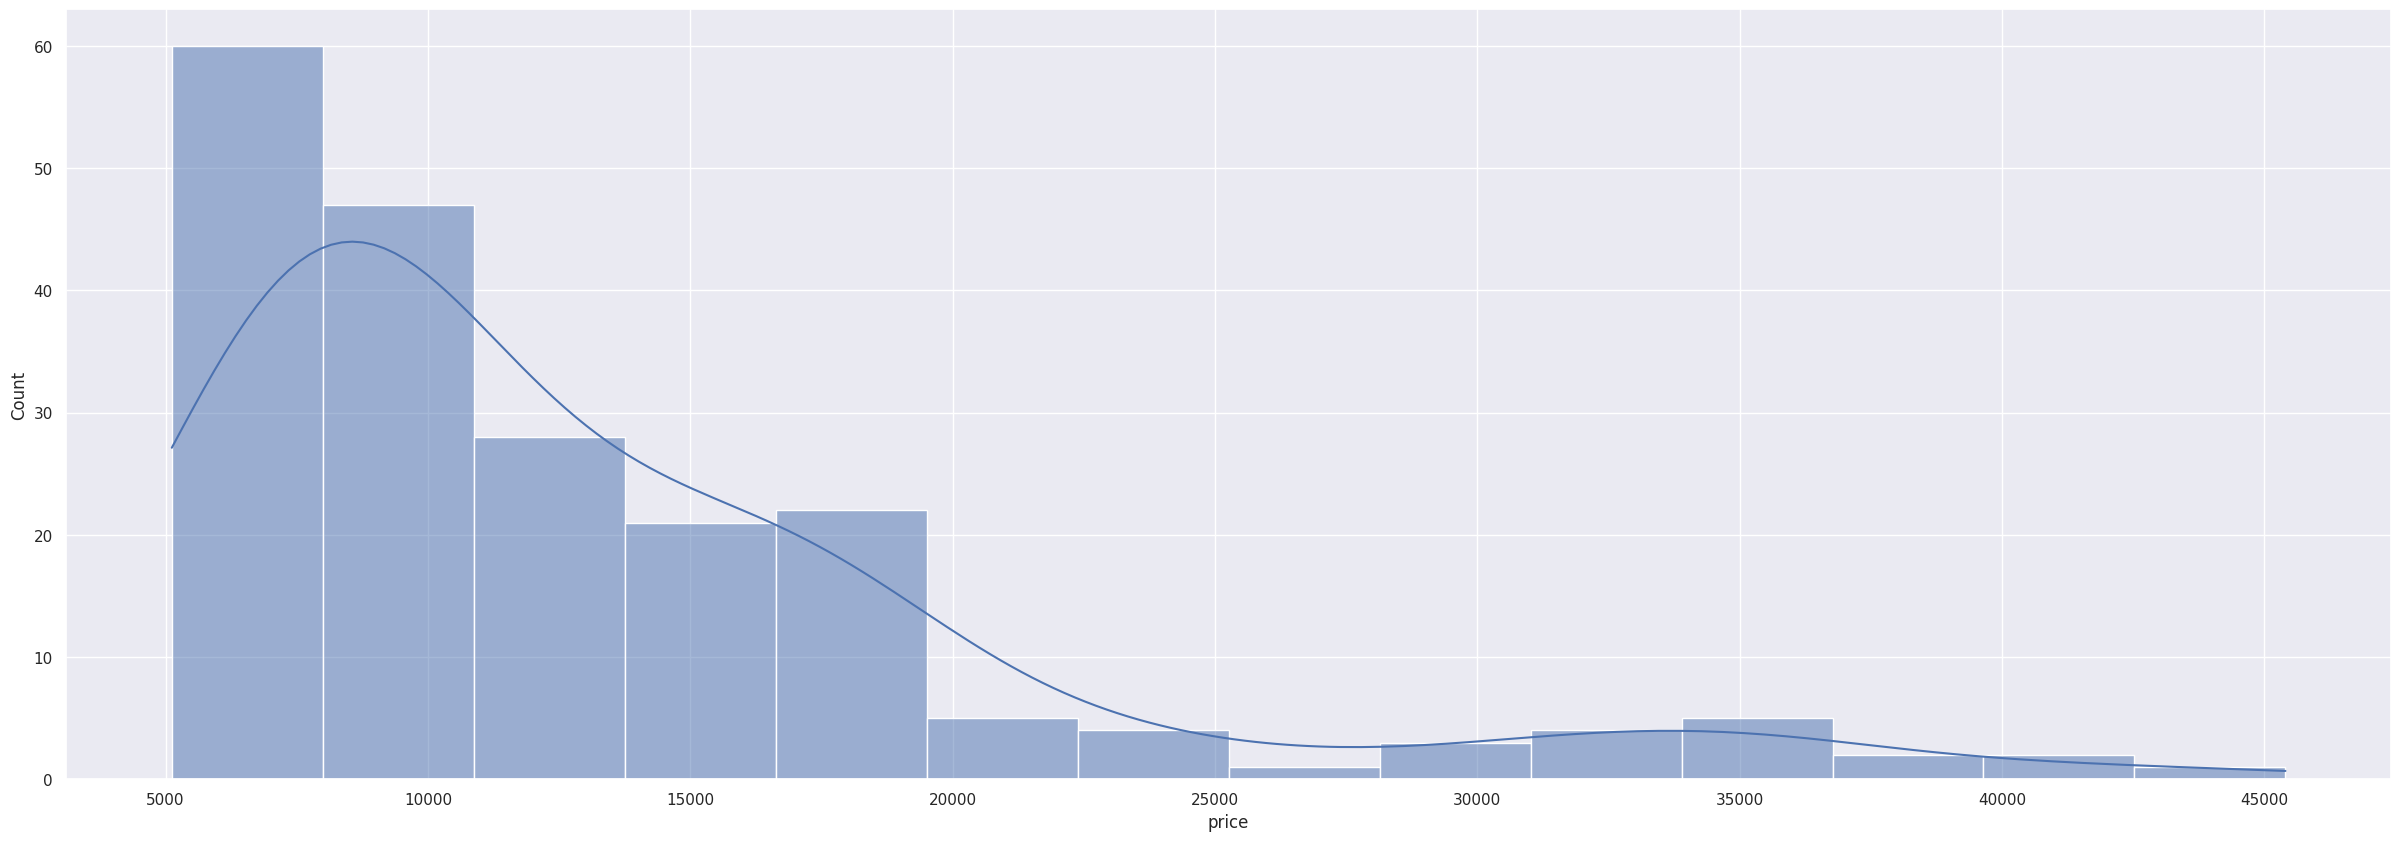

In [47]:
sns.histplot(data=df, x='price', kde=True)

#### 从图上可以看出这是一个有偏分布。我们对它做一个对数处理，以使其更接近正态分布。（另外一个考量是，如果我们以对数后的结果作为标签来建模学习，那还原回 price 的过程，会使用指数操作，这能保证我们得到的价格一定是正数）

<Axes: xlabel='price_log', ylabel='Count'>

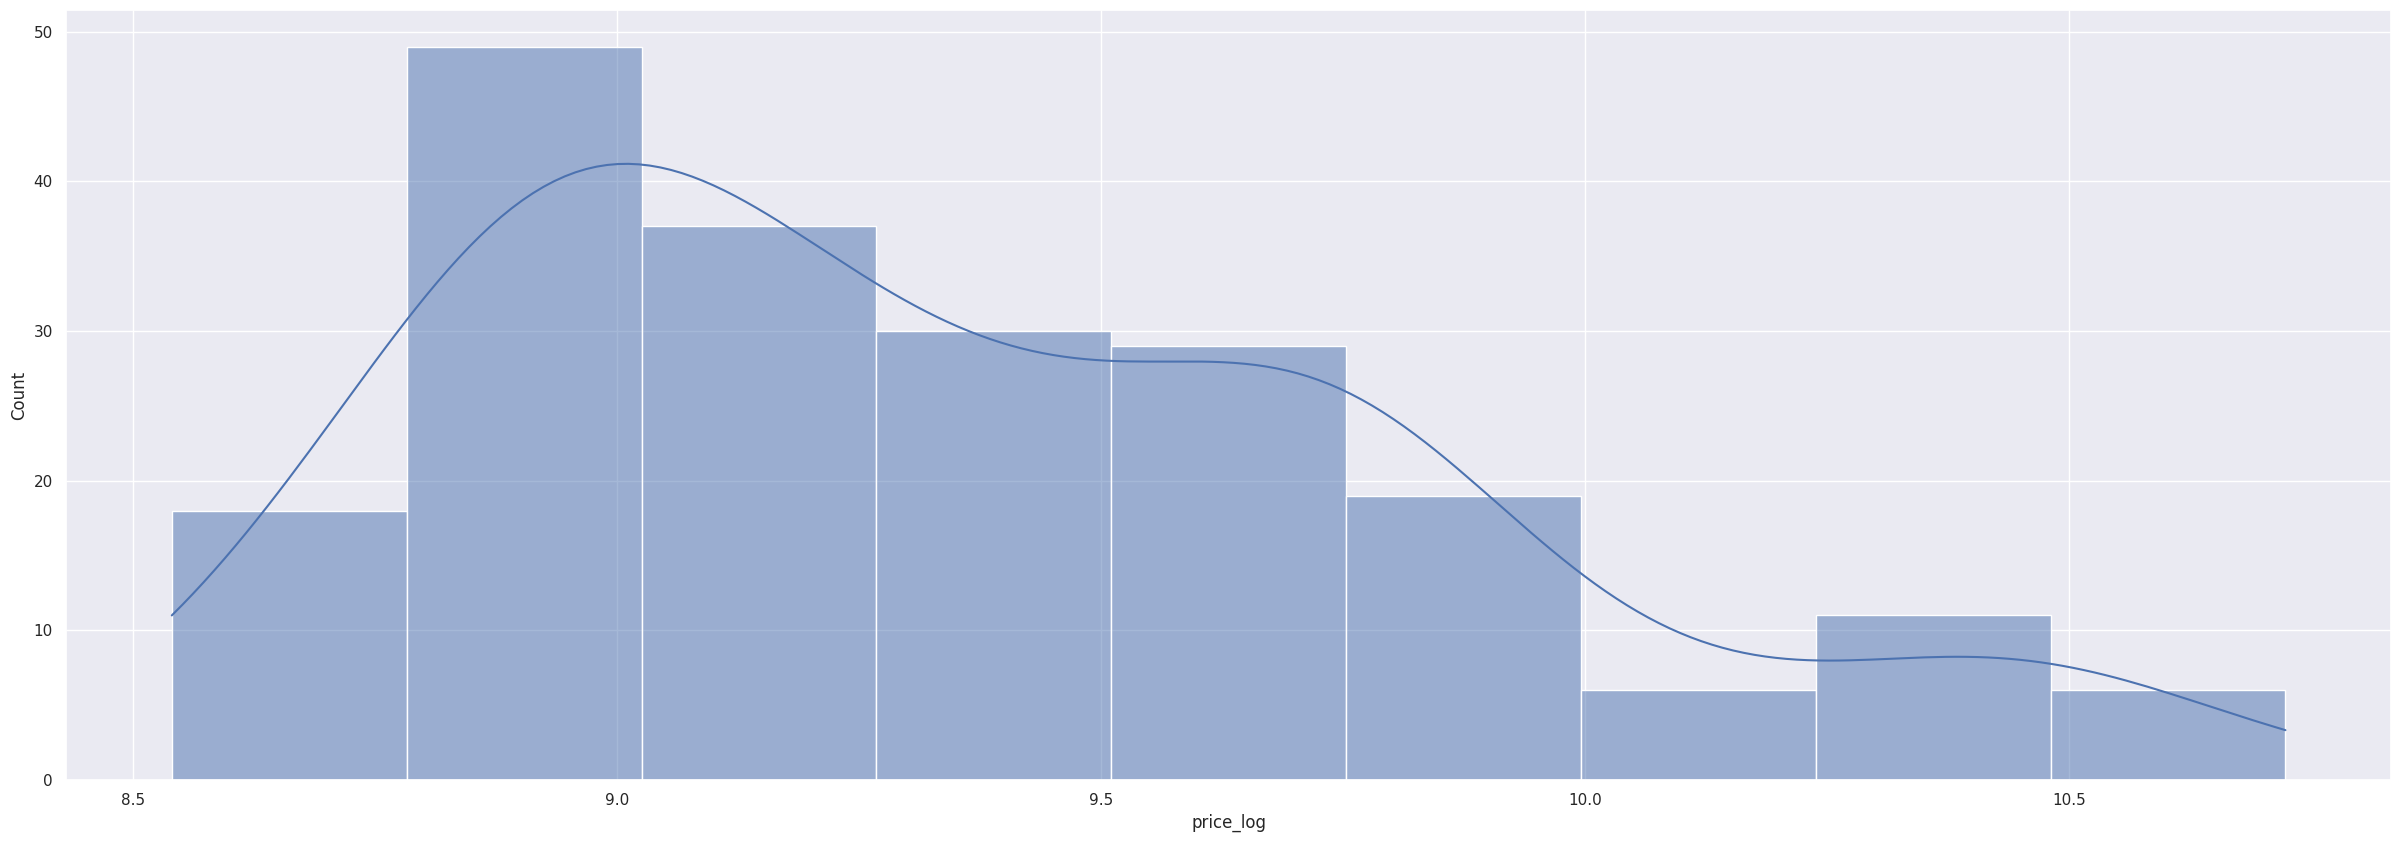

In [48]:
df['price_log'] = np.log(df['price'])
sns.histplot(data=df, x='price_log', kde=True)

In [54]:
if input("是否要进行机器学习建模：（y/n）") != 'y':
	exit(0)

## 机器学习建模

### 数据集切分&数据变换

In [49]:
# 切分数据
from sklearn.model_selection import train_test_split

y = df['price_log']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.333, random_state=1)
# 特征工程 - 幅度缩放
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
columns_to_scale = X.columns[:len(x1.columns)]
X_train[columns_to_scale] = sc.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = sc.transform(X_test[columns_to_scale])

### 建模&调优

In [50]:
# 回归
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

### 建模pipeline

In [51]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV


def metrics(model):
	res_r2 = []
	res_RMSE = []
	res_MSE = []
	model.fit(X_train, y_train)
	Y_pred = model.predict(X_test)

	r2 = round(r2_score(y_test, Y_pred), 4)
	print('R2_Score: ', r2)
	res_r2.append(r2)

	rmse = round(mean_squared_error(np.exp(y_test), np.exp(Y_pred), squared=False), 2)
	print('RMSE: ', rmse)
	res_RMSE.append(rmse)

	mse = round(mean_absolute_error(np.exp(y_test), np.exp(Y_pred)), 2)
	print('MAE: ', mse)
	res_MSE.append(mse)


models = {
	'rfr': RandomForestRegressor(bootstrap=False, max_depth=15, max_features='sqrt', min_samples_split=2,
								 n_estimators=100),
	'lasso': Lasso(alpha=0.005, fit_intercept=True),
	'ridge': Ridge(alpha=10, fit_intercept=True),
	'xgb': xgb.XGBRegressor(bootstrap=True, max_depth=2, max_features='auto', min_sample_split=2, n_estimators=100)
}

# 不同的模型不同建模方法
for mod in models:
	if mod == 'rfr' or mod == 'xgb':
		print('Untuned metrics for: ', mod)
		metrics(models[mod])
		print('\n')
		print('Starting grid search for: ', mod)
		params = {
			"n_estimators": [10, 100, 1000, 2000, 4000, 6000],
			"max_features": ["auto", "sqrt", "log2"],
			"max_depth": [2, 4, 8, 12, 15],
			"min_samples_split": [2, 4, 8],
			"bootstrap": [True, False],
		}
		if mod == 'rfr':
			rfr = RandomForestRegressor()
			grid = GridSearchCV(rfr, params, verbose=0, cv=2, n_jobs=-1)
			grid.fit(X_train, y_train)
			print("Best score: ", grid.best_score_)
			print("Best params: ", grid.best_params_)
		else:
			xgboost = xgb.XGBRegressor()
			grid = GridSearchCV(xgboost, params, verbose=0, cv=2, n_jobs=-1)
			grid.fit(X_train, y_train)
			print("Best score: ", grid.best_score_)
			print("Best params: ", grid.best_params_)
	else:
		print('Untuned metrics for: ', mod)
		metrics(models[mod])
		print('\n')
		print('Starting grid search for: ', mod)
		params = {
			"alpha": [0.005, 0.05, 0.1, 1, 10, 100, 290, 500],
			"fit_intercept": [True, False]
		}
		if mod == 'lasso':
			lasso = Lasso()
			grid = GridSearchCV(lasso, params, verbose=0, cv=2, n_jobs=-1)
			grid.fit(X_train, y_train)
			print("Best score: ", grid.best_score_)
			print("Best params: ", grid.best_params_)
		else:
			ridge = Ridge()
			grid = GridSearchCV(ridge, params, verbose=0, cv=2, n_jobs=-1)
			grid.fit(X_train, y_train)
			print("Best score: ", grid.best_score_)
			print("Best params: ", grid.best_params_)

Untuned metrics for:  rfr
R2_Score:  0.92
RMSE:  2157.51
MAE:  1342.79


Starting grid search for:  rfr


/home/flkbme_/anaconda3/envs/ruitong/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
360 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
237 fits failed with the following error:
Traceback (most recent call last):
  File "/home/flkbme_/anaconda3/envs/ruitong/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/flkbme_/anaconda3/envs/ruitong/lib/python3.11/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/home/flkbme_/anaconda3/envs/ruitong/lib/python3.11/site-packages/sklearn/base.py", line 638, in _validat

Best score:  0.9142670565649207
Best params:  {'bootstrap': False, 'max_depth': 8, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 100}
Untuned metrics for:  lasso
R2_Score:  0.9305
RMSE:  1767.75
MAE:  1195.47


Starting grid search for:  lasso
Best score:  0.9051185423524086
Best params:  {'alpha': 0.005, 'fit_intercept': True}
Untuned metrics for:  ridge
R2_Score:  0.9261
RMSE:  2115.54
MAE:  1370.68


Starting grid search for:  ridge
Best score:  0.9138199794937979
Best params:  {'alpha': 10, 'fit_intercept': True}
Untuned metrics for:  xgb
R2_Score:  0.9214
RMSE:  2321.16
MAE:  1485.56


Starting grid search for:  xgb


/home/flkbme_/anaconda3/envs/ruitong/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [15:34:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "bootstrap", "max_features", "min_sample_split" } are not used.

  warnings.warn(smsg, UserWarning)
/home/flkbme_/anaconda3/envs/ruitong/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [15:34:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "bootstrap", "max_features", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/home/flkbme_/anaconda3/envs/ruitong/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [15:34:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "bootstrap", "max_features", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/home/flkbme_/anaconda3/envs/ruitong/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [15:34:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "bootstrap", "max_features", "min_

Best score:  0.8768610698498217
Best params:  {'bootstrap': True, 'max_depth': 2, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 10}


/home/flkbme_/anaconda3/envs/ruitong/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [15:36:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "bootstrap", "max_features", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


### 调整参数

In [52]:
model = {
	'rfr': RandomForestRegressor(bootstrap=False, max_depth=12, max_features='log2', min_samples_split=2,
								 n_estimators=100),
	'lasso': Lasso(alpha=0.005, fit_intercept=True),
	'ridge': Ridge(alpha=10, fit_intercept=True),
	'xgb': xgb.XGBRegressor(bootstrap=True, max_depth=4, max_features='auto', min_sample_split=2, n_estimators=100)
}

for mod in models:
	print(mod, ": ")
	metrics(model[mod])
	print("\n")

rfr : 
R2_Score:  0.9178
RMSE:  2094.46
MAE:  1379.27


lasso : 
R2_Score:  0.9305
RMSE:  1767.75
MAE:  1195.47


ridge : 
R2_Score:  0.9261
RMSE:  2115.54
MAE:  1370.68


xgb : 
R2_Score:  0.9096
RMSE:  2387.3
MAE:  1574.2


/home/flkbme_/anaconda3/envs/ruitong/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [15:36:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "bootstrap", "max_features", "min_sample_split" } are not used.

  warnings.warn(smsg, UserWarning)


### 保存模型

In [53]:
import pickle

lasso_reg = Lasso(alpha=0.005, fit_intercept=True)
lasso_reg.fit(X_train, y_train)
pickle.dump(lasso_reg, open('model.pkl', 'wb'))